[View in Colaboratory](https://colab.research.google.com/github/kurakura0916/fashion-mnist_GPU/blob/master/fashion_mnist_LeNet.ipynb)

In [1]:
!apt -y install libcusparse8.0 libnvrtc8.0 libnvtoolsext1
!ln -snf /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so.8.0 /usr/lib/x86_64-linux-gnu/libnvrtc-builtins.so
!pip install https://github.com/kmaehashi/chainer-colab/releases/download/2018-02-06/cupy_cuda80-4.0.0b3-cp36-cp36m-linux_x86_64.whl
!pip install 'chainer==4.0.0b3'
!apt-get install graphviz
!pip install 'chaineripy'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libcusparse8.0 libnvrtc8.0 libnvtoolsext1
0 upgraded, 3 newly installed, 0 to remove and 0 not upgraded.
Need to get 28.9 MB of archives.
After this operation, 71.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu artful/multiverse amd64 libcusparse8.0 amd64 8.0.61-1 [22.6 MB]
Get:2 http://archive.ubuntu.com/ubuntu artful/multiverse amd64 libnvrtc8.0 amd64 8.0.61-1 [6,225 kB]
Get:3 http://archive.ubuntu.com/ubuntu artful/multiverse amd64 libnvtoolsext1 amd64 8.0.61-1 [32.2 kB]
Fetched 28.9 MB in 1s (16.2 MB/s)

78Selecting previously unselected package libcusparse8.0:amd64.
(Reading database ... 18396 files and directories currently installed.)
Preparing to unpack .../libcusparse8.0_8.0.61-1_amd64.deb ...
7Progress: [  0%] [..........................................................] 87Progress: [  6%] [###..

    100% |████████████████████████████████| 205.2MB 190kB/s 
    100% |████████████████████████████████| 81kB 2.6MB/s 
    100% |████████████████████████████████| 368kB 5.7MB/s 
  Running setup.py bdist_wheel for chainer ... - \ | / - done
  Stored in directory: /content/.cache/pip/wheels/7a/e7/26/c13ce14e84f7f2a7209a31f5a1e327b8c681c5bcb3abcd0bec
  Running setup.py bdist_wheel for filelock ... - done
  Stored in directory: /content/.cache/pip/wheels/35/ba/67/4cc48738870c3b54f9e3b5d78bf9de130befb70c1d359faf8b
Successfully built chainer filelock
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fontconfig libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3 libgraphite2-3
  libgvc6 libgvpr2 libharfbuzz0b libjbig0 libltdl7 libpango-1.0-0
  libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4 libpixman-1-0
  libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0 libxcb-shm0
  l

Get:11 http://archive.ubuntu.com/ubuntu artful/main amd64 libxcb-shm0 amd64 1.12-1ubuntu1 [5,482 B]
Get:12 http://archive.ubuntu.com/ubuntu artful/main amd64 libcairo2 amd64 1.14.10-1ubuntu1 [558 kB]
Get:13 http://archive.ubuntu.com/ubuntu artful/main amd64 libltdl7 amd64 2.4.6-2 [38.8 kB]
Get:14 http://archive.ubuntu.com/ubuntu artful/main amd64 libthai-data all 0.1.26-3 [132 kB]
Get:15 http://archive.ubuntu.com/ubuntu artful/main amd64 libdatrie1 amd64 0.2.10-5 [17.6 kB]
Get:16 http://archive.ubuntu.com/ubuntu artful/main amd64 libthai0 amd64 0.1.26-3 [17.7 kB]
Get:17 http://archive.ubuntu.com/ubuntu artful/main amd64 libpango-1.0-0 amd64 1.40.12-1 [152 kB]
Get:18 http://archive.ubuntu.com/ubuntu artful/main amd64 libgraphite2-3 amd64 1.3.10-2 [78.3 kB]
Get:19 http://archive.ubuntu.com/ubuntu artful/main amd64 libharfbuzz0b amd64 1.4.2-1 [211 kB]
Get:20 http://archive.ubuntu.com/ubuntu artful/main amd64 libpangoft2-1.0-0 amd64 1.40.12-1 [33.2 kB]
Get:21 http://archive.ubuntu.com/ubun

Selecting previously unselected package libpangocairo-1.0-0:amd64.
Preparing to unpack .../20-libpangocairo-1.0-0_1.40.12-1_amd64.deb ...
Unpacking libpangocairo-1.0-0:amd64 (1.40.12-1) ...
Selecting previously unselected package libpathplan4.
Preparing to unpack .../21-libpathplan4_2.38.0-16ubuntu2_amd64.deb ...
Unpacking libpathplan4 (2.38.0-16ubuntu2) ...
Selecting previously unselected package libgvc6.
Preparing to unpack .../22-libgvc6_2.38.0-16ubuntu2_amd64.deb ...
Unpacking libgvc6 (2.38.0-16ubuntu2) ...
Selecting previously unselected package libgvpr2.
Preparing to unpack .../23-libgvpr2_2.38.0-16ubuntu2_amd64.deb ...
Unpacking libgvpr2 (2.38.0-16ubuntu2) ...
Selecting previously unselected package libxt6:amd64.
Preparing to unpack .../24-libxt6_1%3a1.1.5-1_amd64.deb ...
Unpacking libxt6:amd64 (1:1.1.5-1) ...
Selecting previously unselected package libxmu6:amd64.
Preparing to unpack .../25-libxmu6_2%3a1.1.2-2_amd64.deb ...
Unpacking libxmu6:amd64 (2:1.1.2-2) ...
Selecting previ

    100% |████████████████████████████████| 2.2MB 7.5MB/s 


In [0]:
import chainer
import numpy as np
import pandas as pd
np.random.seed(151)
from chainer import Chain, configuration
import chainer.links as L
import chainer.functions as F
from chainer.optimizers import Adam
from chainer.datasets import mnist
from chainer.iterators import SerialIterator
from chainer.training import StandardUpdater, Trainer
from chainer.training.extensions import PrintReport, LogReport, Evaluator
from chainer.datasets import get_fashion_mnist
import matplotlib.pyplot as plt

In [6]:
print("GPU availability:",chainer.cuda.available)
print("cuDNN availablility:",chainer.cuda.cudnn_enabled)

GPU availability: True
cuDNN availablility: True


In [7]:
train, test = get_fashion_mnist(withlabel=True, ndim=3, scale=255.)

In [8]:
print(train._datasets[0].shape)
print(train._datasets[1].shape)
print(test._datasets[0].shape)
print(test._datasets[1].shape)

(60000, 1, 28, 28)
(60000,)
(10000, 1, 28, 28)
(10000,)


In [0]:
X_train = train._datasets[0]
y_train = train._datasets[1]
X_test = test._datasets[0]
y_test= test._datasets[1]

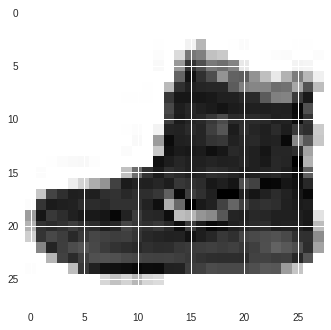

label is 9
**************************************


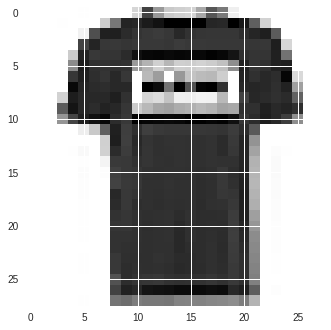

label is 0
**************************************


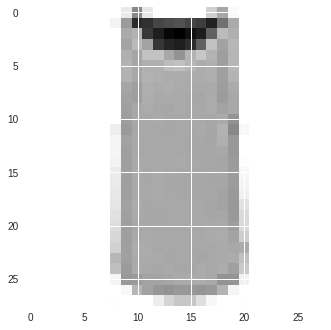

label is 0
**************************************


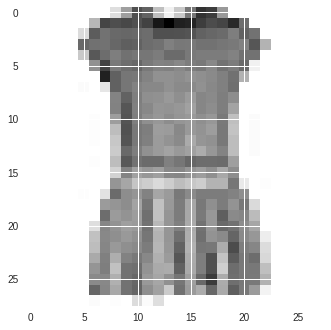

label is 3
**************************************


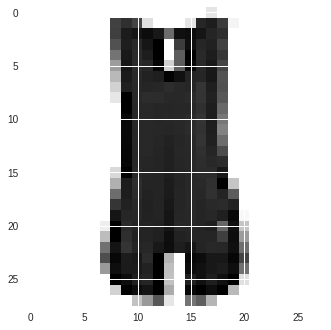

label is 0
**************************************


In [11]:
for i  in range(5):
    plt.imshow(X_train[i].reshape(28,28),cmap="gray_r")
    plt.show()
    print("label is",y_train[i])
    print("**************************************")

In [0]:
# モデルの作成
class LeNet(Chain):
    def __init__(self):
        super(LeNet,self).__init__()
        with self.init_scope():
            self.conv1 = L.Convolution2D(1,6,5)
            self.batch1 = L.BatchNormalization(6)
            self.conv2 = L.Convolution2D(6,16,5)
            self.batch2 = L.BatchNormalization(16)
            self.fc1 = L.Linear(120)
            self.fc2 = L.Linear(64)
            self.fc3 = L.Linear(10)
    
    def __call__(self,x):
        h = F.max_pooling_2d(self.batch1(F.relu(self.conv1(x))),2,stride=2)
        h = F.max_pooling_2d(self.batch2(F.relu(self.conv2(h))),2,stride=2)
        h = F.relu(self.fc1(h)) 
        h = F.dropout(h,ratio=0.5)
        h = F.relu(self.fc2(h))
        h = F.dropout(h,ratio=0.5)
        return self.fc3(h)

In [27]:
# 学習の実行（CPU）
model = LeNet()

classifier = L.Classifier(model)
optimizer = Adam()
optimizer.setup(classifier)
train_iterator = SerialIterator(train, batch_size=100, repeat=True)
test_iterator = SerialIterator(test, batch_size=100, shuffle=False, repeat=False)
updater = StandardUpdater(train_iterator, optimizer, loss_func=classifier)
trainer = Trainer(updater, (5001, 'iteration'))
trainer.extend(Evaluator(test_iterator, classifier), trigger=(10, 'iteration'), name="test")
trainer.extend(PrintReport(['iteration', "elapsed_time","main/loss", "test/main/loss","main/accuracy","test/main/accuracy"]))

logreport = LogReport(trigger=(100, 'iteration'))
trainer.extend(logreport)
trainer.run()

iteration   elapsed_time  main/loss   test/main/loss  main/accuracy  test/main/accuracy
100         42.2483       1.48012     1.02023         0.4889         0.67405             
200         83.1596       0.895449    0.647328        0.6783         0.75767             
300         123.804       0.740545    0.579153        0.7342         0.77585             
400         165.304       0.684683    0.53889         0.7432         0.78765             
500         206.573       0.641445    0.513606        0.7637         0.80223             
600         247.157       0.586481    0.492498        0.7848         0.80957             
700         287.604       0.574745    0.475798        0.7916         0.81971             
800         328.183       0.555745    0.464073        0.7987         0.82616             
900         368.311       0.530296    0.450044        0.8087         0.83078             
1000        407.825       0.531646    0.435515        0.811          0.83872             
1100        

4500        1829.47       0.332033    0.328645        0.88           0.88056             
4600        1868.49       0.348769    0.323081        0.8788         0.88252             
4700        1907.3        0.359367    0.325586        0.8786         0.88228             
4800        1946.95       0.354366    0.320017        0.8772         0.88406             
4900        1986.03       0.329131    0.328293        0.8845         0.88291             
5000        2025.22       0.335863    0.319304        0.8854         0.88478             


In [0]:
model = LeNet()

In [0]:
gpu_id = 0
if gpu_id >= 0:
  model.to_gpu(gpu_id)

In [38]:
# 学習の実行（GPU）
classifier = L.Classifier(model)
optimizer = Adam()
optimizer.setup(classifier)
train_iterator = SerialIterator(train, batch_size=100, repeat=True)
test_iterator = SerialIterator(test, batch_size=100, shuffle=False, repeat=False)
updater = StandardUpdater(train_iterator, optimizer, loss_func=classifier,device=gpu_id)
trainer = Trainer(updater, (5001, 'iteration'))
trainer.extend(Evaluator(test_iterator, classifier,device=gpu_id), trigger=(10, 'iteration'), name="test")
trainer.extend(PrintReport(['iteration', "elapsed_time","main/loss", "test/main/loss","main/accuracy","test/main/accuracy"]))

logreport = LogReport(trigger=(100, 'iteration'))
trainer.extend(logreport)
trainer.run()

iteration   elapsed_time  main/loss   test/main/loss  main/accuracy  test/main/accuracy
100         14.8583       1.306       0.90787         0.5121         0.68931             
200         27.4726       0.858616    0.629747        0.6881         0.7626              
300         42.6078       0.732521    0.558748        0.734          0.78606             
400         58.0232       0.651136    0.526143        0.7685         0.80225             
500         70.3385       0.614535    0.49012         0.7852         0.81812             
600         79.0342       0.582108    0.473959        0.7962         0.82418             
700         85.7404       0.552623    0.448386        0.8075         0.83604             
800         92.4979       0.544731    0.438421        0.8131         0.83879             
900         99.2291       0.500702    0.427612        0.8251         0.84313             
1000        105.943       0.498065    0.414864        0.8227         0.84667             
1100        

4500        481.206       0.343494    0.322591        0.8796         0.88545             
4600        492.999       0.339684    0.323546        0.8813         0.88361             
4700        504.89        0.339747    0.319902        0.881          0.88534             
4800        516.72        0.350905    0.32018         0.8775         0.88697             
4900        528.51        0.327907    0.321381        0.8825         0.88514             
5000        540.269       0.321371    0.323535        0.8875         0.88385             


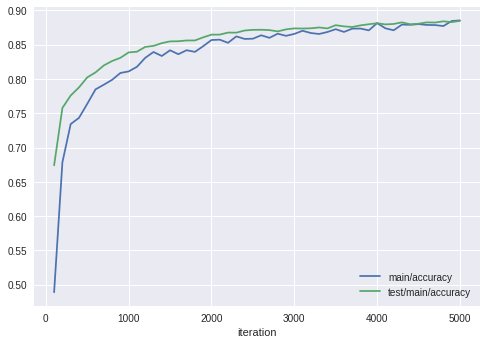

In [28]:
log_df = pd.DataFrame(logreport.log)
pd.DataFrame(log_df[["main/accuracy", "test/main/accuracy"]].values, columns=["main/accuracy", "test/main/accuracy"], index=log_df["iteration"]).plot()

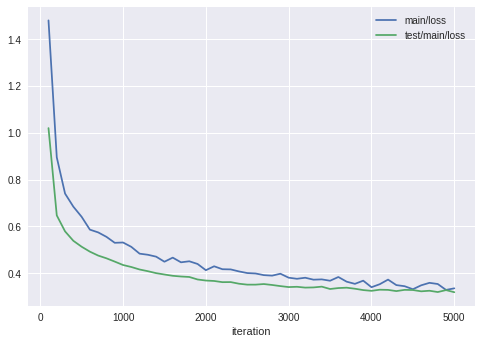

In [29]:
log_df = pd.DataFrame(logreport.log)
pd.DataFrame(log_df[["main/loss", "test/main/loss"]].values, columns=["main/loss", "test/main/loss"], index=log_df["iteration"]).plot()

In [30]:
from sklearn.metrics import classification_report

with configuration.using_config('train', False):
    predicts = model(np.array([data[0] for data in test], dtype=np.float32))
predicts = np.array([predict.data for predict in predicts])
predicts_y = np.argmax(predicts, axis=1)

print("*** Scores for Test data ***")
print(classification_report(np.array([data[1] for data in test], dtype=np.float32), predicts_y))

*** Scores for Test data ***
             precision    recall  f1-score   support

        0.0       0.85      0.83      0.84      1000
        1.0       1.00      0.96      0.98      1000
        2.0       0.77      0.84      0.81      1000
        3.0       0.86      0.91      0.89      1000
        4.0       0.81      0.76      0.78      1000
        5.0       0.98      0.96      0.97      1000
        6.0       0.69      0.66      0.67      1000
        7.0       0.91      0.98      0.94      1000
        8.0       0.96      0.98      0.97      1000
        9.0       0.98      0.93      0.96      1000

avg / total       0.88      0.88      0.88     10000



In [0]:
# モデルを保存する
model = myConvNN()
model.to_cpu()
chainer.serializers.save_npz('my_model.npz', model, compression=True)